<a href="https://colab.research.google.com/github/maekuhi/NeuralNetworks/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a booklet of my learnings about Neural Networks

---
**The first session: Multi Layer Perceptrone (MLP) Neural Networks:**

---

# How to formulate the output of a Noron?

<img src="https://drive.google.com/uc?export=view&id=1ADlhiD7jQBN-zGuaEqNI3pyRRGJup6SU" width="500">

<p style="font-size:13px; color:gray;">
Image Source: <a href="https://mriquestions.com/what-is-a-neural-network.html">mriquestions</a>
</p>

The input is:
$$
\vec{x} = [x_1 ... x_n]^T
$$
The weight vector is:
$$
\vec{w} = [w_1 ... w_n]
$$
The output will be:
$$
z = f(w^Tx+b)
$$
Where b is the bias.

## Layers of a perceptrone

<img src="https://drive.google.com/uc?export=view&id=1eCFn5zGJhp0U3zNy-uXUHFtKBujVWXhb" width="500">

<p style="font-size:13px; color:gray;">
Image Source: <a href="https://mriquestions.com/what-is-a-neural-network.html">mriquestions</a>
</p>

Here, we want to minimize the error of the process output ($y_i$) and artificial neural network (AAN) ($\hat{y}_i$):

$e = y_i - \hat{y}_i = y - f(x|θ)$ \
$min_{\theta} e^2 = (y - f(x|\theta))^2$ \
${\theta}^* = argmin_{\theta} e^2$

Where $\theta$ is the optimized value. So, we can use (weighted) mean square error (W)MSE:

$min (\frac{1}{N} × Σ_{i=1}^N e_i^2)$

## How to determine the NN's coefficients?

### Classics:
Levenberg-Marquardt-Algorithmus

*   Gradient Descent (GD)
*   Adaptive Learning (AL)
*   Back Propagation (BP)

### Intelligent Optimization:

*   GA
*   PSO
*   ICA
*   DE
*   SA



> Book: Simon Haykin



# Applications of the Neural Networks

*   Modelling and function approximation
*   Clustering and Vector Quantization
* Feature extraction
* Associated memory
* Compression
* Optimization
* Control and System Identification

# Implementation

## Problem 1

**Function Approximation**

- We have some data
- We want to fit a curve/line on them

<img src="https://drive.google.com/uc?export=view&id=1kWPP-3G2kMn0sDry_JtzAVSjYkJqROy6" width="500">

<p style="font-size:13px; color:gray;">
Image Source: <a href="https://faradars.org/courses/mvrnn9102-neural-networks-in-matlab-video-tutorials-pack">Faradars</a>
</p>

- Instead of the y, we want to use MLP Neural Network
- Data organization:
  - Train Data
  - Validation Data
  - Test Data

### Example 1

We want to approximate tha trigonometric functio (for example sine)

Epoch 0, Loss = 0.500066876411438


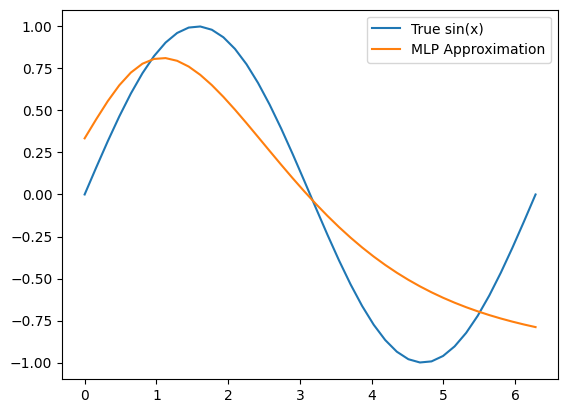

In [ ]:
# Simple function approximation
# The first step: data generating
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
x = np.linspace(0, 2*np.pi, 40)
y = np.sin(x)

x_train = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Define MLP model
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item()}")

# Evaluate
y_pred = model(x_train).detach().numpy()

plt.plot(x, y, label='True sin(x)')
plt.plot(x, y_pred, label='MLP Approximation')
plt.legend()
plt.show()
